In [50]:
import sys
sys.path.insert(0, '../functions/')

In [51]:
from skimage.filters import threshold_otsu
import tiffIO as tIO
import mouseVis as mv
import plosLib as pLib
import connectLib as cLib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [52]:
#load the data
data0 = tIO.unzipChannels(tIO.loadTiff('../../data/SEP-GluA1-KI_tp1.tif'))[0][0:5]

In [53]:
#generate a foreground probability map for the data
probVox = pLib.pipeline(data0)

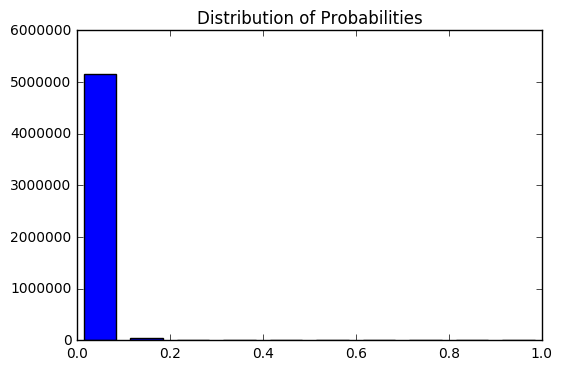

In [5]:
#generate a histogram to show bimodlity of the foreground probs
mv.generateVoxHist(probVox, figName='Distribution of Probabilities')
plt.show()

In [6]:
#get the otsu binarization of the probability voxel
bianVox = cLib.otsuVox(probVox)

In [49]:
#get the connected components of the binary supervoxel
connectedComponents = cLib.connectedComponents(bianVox)

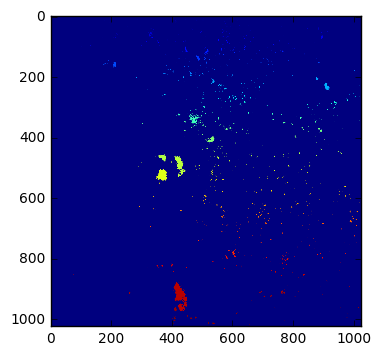

In [47]:
plt.imshow(connectedComponents[2])
plt.show()

In [33]:
sizeHistCounts = np.bincount(np.ndarray.flatten(connectedComponents[2]))

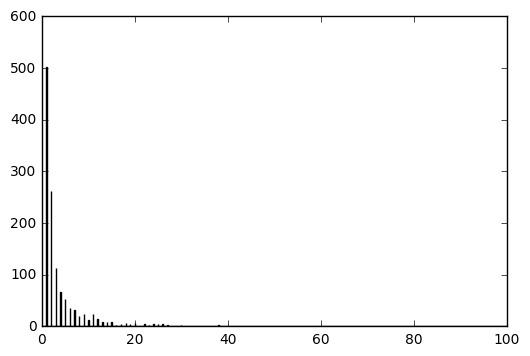

In [44]:
plt.hist(sizeHistCounts, bins=len(sizeHistCounts), range=[0, 100])
plt.show()